In [1]:
setwd('/import/a.jif/')

In [2]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
daa = readRDS('./MSC.after_ano.rds')

In [4]:
DefaultAssay(daa) = 'RNA'

In [5]:
library(Seurat)

In [6]:
Idents(daa) = 'celltype'

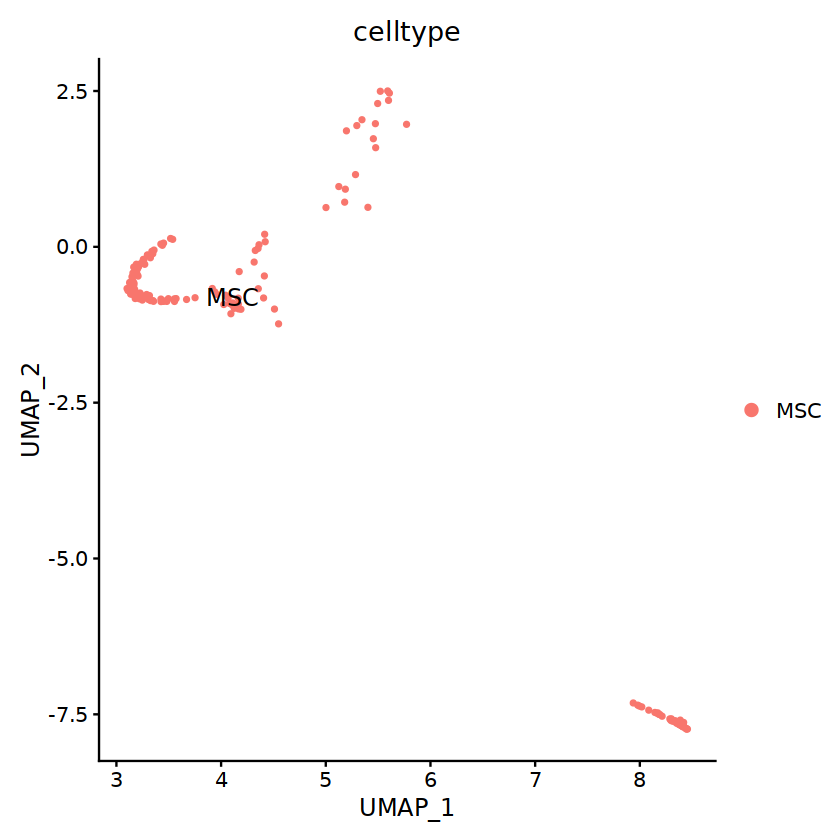

In [7]:
DimPlot(daa, group.by="celltype", label=T, label.size=5, reduction='umap')

In [8]:
immune.combined = daa

In [9]:
library(harmony)
DefaultAssay(immune.combined) = 'RNA'
sceList <- SplitObject(immune.combined, split.by = "orig.ident")
single.ob=merge(sceList[[1]],sceList[2:length(sceList)])
DefaultAssay(single.ob) = 'RNA'
scRNA_harmony = single.ob
scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:30)
scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:30) %>% FindClusters(resolution =  0.1)
##作图
#group_by_cluster

Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.2.3"
Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony converged after 1 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
  0.502   3.971   0.128 

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
04:47:37 UMAP embedding parameters a = 0.9922 b = 1.112

04:47:37 Read 194 rows and found 30 numeric columns

04:47:37 Using Annoy for neighbor search, n_neighbors = 30

04:47:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

04:47:37 Writing NN index file to temp file /tmp/RtmpxAEhq4/file12d8d3e334787

04:47:37 Searching Annoy index using 1 thread, search_k = 3000

04:47:38 Annoy recall = 100%

04:47:38 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 194
Number of edges: 5520

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9422
Number of communities: 2
Elapsed time: 0 seconds


In [10]:
options(repr.plot.width = 12,repr.plot.height = 8)

In [11]:
table(scRNA_harmony$group)


  Con Tumor 
  191     3 

In [12]:
options(repr.plot.width = 8,repr.plot.height = 6)

In [13]:
Idents(scRNA_harmony) = 'seurat_clusters'

In [14]:
scRNA_harmony = subset(scRNA_harmony,idents = c(0,1))

In [15]:
options(repr.plot.width = 5,repr.plot.height = 5)

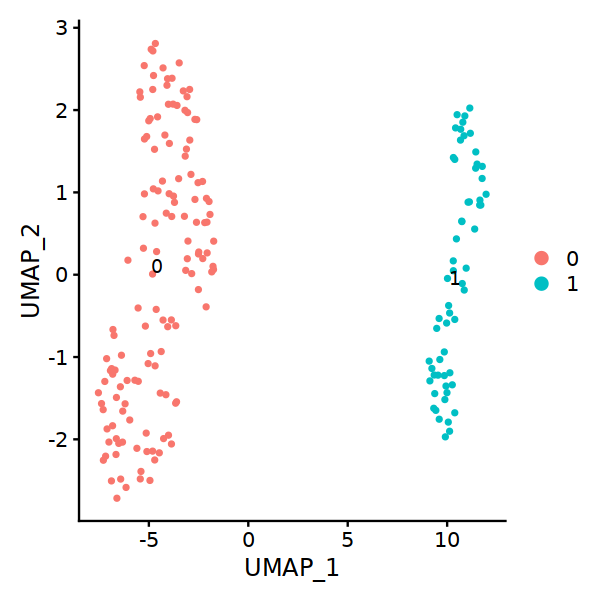

In [16]:
DimPlot(scRNA_harmony, reduction = "umap",ncol = 2,label = T)

In [18]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [19]:
ggsave('MSC.figure1.pdf',width = 5,height = 6)

In [20]:
Idents(scRNA_harmony) = 'seurat_clusters'
DefaultAssay(scRNA_harmony) = 'RNA'
sce.markers <- FindAllMarkers(object = scRNA_harmony, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 



Calculating cluster 0

Calculating cluster 1



In [21]:
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(8, avg_log2FC)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [22]:
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(8, avg_log2FC)

In [23]:
library(ggplot2)